# Änderung der kommunizierten Covid-19 Zahlen der Kantone über die Zeit

In [1]:
%pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import git
import io
import datetime
from collections import defaultdict

# to use different styles, make sure to reload the default to always get clean results
# plt.style.available
def use_style(style):
    plt.style.use('default')
    plt.style.use(style)

In [14]:
repo = git.Repo('../covid_19', odbt=git.GitCmdObjectDB)

In [9]:
cache = defaultdict(defaultdict)

In [16]:
def get_file_from_date(repo, date, path):
    df = None
    if date in cache and path in cache[date]:
        df = cache[date][path]
    else:
        commit_hash = repo.git.rev_list('-n 1', f'--before={date}T23:59:59', 'master', '--', path)
        commit = repo.commit(commit_hash)
        targetfile = commit.tree / path
        with io.BytesIO(targetfile.data_stream.read()) as f:
            df = pd.read_csv(f)
            cache[date][path] = df
    return df

In [22]:
# fill the cache
# NOTE: you can skip this step and instead load the data later
# This steps takes a long time ~30-60min depending on your environment (disk, memory etc.)
start_date = datetime.datetime(year=2020, month=4, day=9)
end_date = datetime.datetime.now()

for current_date in pd.date_range(start_date, end_date):
    print(current_date)
    df_day_ge = get_file_from_date(repo, current_date.strftime("%Y-%m-%d"), 'fallzahlen_kanton_total_csv_v2/COVID19_Fallzahlen_Kanton_GE_total.csv')
    df_day_ch = get_file_from_date(repo, current_date.strftime("%Y-%m-%d"), 'COVID19_Fallzahlen_CH_total_v2.csv')

print("Cache filled.")

2020-04-09 00:00:00
2020-04-10 00:00:00
2020-04-11 00:00:00
2020-04-12 00:00:00
2020-04-13 00:00:00
2020-04-14 00:00:00
2020-04-15 00:00:00
2020-04-16 00:00:00
2020-04-17 00:00:00
2020-04-18 00:00:00
2020-04-19 00:00:00
2020-04-20 00:00:00
2020-04-21 00:00:00
2020-04-22 00:00:00
2020-04-23 00:00:00
2020-04-24 00:00:00
2020-04-25 00:00:00
2020-04-26 00:00:00
2020-04-27 00:00:00
2020-04-28 00:00:00
2020-04-29 00:00:00
2020-04-30 00:00:00
2020-05-01 00:00:00
2020-05-02 00:00:00
2020-05-03 00:00:00
2020-05-04 00:00:00
2020-05-05 00:00:00
2020-05-06 00:00:00


ValueError: SHA could not be resolved, git returned: b''

In [20]:
df0503 = get_file_from_date(repo, '2020-05-07', 'COVID19_Fallzahlen_CH_total_v2.csv')
df0503

,date,time,abbreviation_canton_and_fl,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased,source
0,2020-02-25,NaN,GE,72.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,https://www.ge.ch/document/20094/telecharger
1,2020-02-25,NaN,TI,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,https://www4.ti.ch/fileadmin/DSS/DSP/UMC/malat...
2,2020-02-26,NaN,GE,177.0,1.0,NaN,1.0,0.0,0.0,NaN,0.0,https://www.ge.ch/document/20094/telecharger
3,2020-02-26,NaN,TI,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,https://www4.ti.ch/fileadmin/DSS/DSP/UMC/malat...
4,2020-02-27,NaN,FL,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.regierung.li/media/attachments/83-...
5,2020-02-27,NaN,GE,325.0,1.0,NaN,1.0,0.0,0.0,NaN,0.0,https://www.ge.ch/document/20094/telecharger
6,2020-02-27,NaN,JU,NaN,1.0,NaN,1.0,0.0,NaN,NaN,0.0,https://www.jura.ch/Htdocs/Files/v/34366.xlsx/...
7,2020-02-27,NaN,TI,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,https://www4.ti.ch/fileadmin/DSS/DSP/UMC/malat...
8,2020-02-27,14:30,ZH,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,https://gd.zh.ch/internet/gesundheitsdirektion...
9,2020-02-27,19:17,BS,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.coronavirus.bs.ch/nm/2020-coronavi...


In [51]:
df0503.groupby(['date']).sum().reset_index()

,date,ncumul_tested,ncumul_conf,new_hosp,current_hosp,current_icu,current_vent,ncumul_released,ncumul_deceased
0,2020-02-25,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-02-26,177.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2020-02-27,328.0,6.0,0.0,2.0,0.0,0.0,0.0,0.0
3,2020-02-28,532.0,13.0,0.0,12.0,0.0,0.0,0.0,0.0
4,2020-02-29,673.0,20.0,0.0,14.0,0.0,0.0,0.0,0.0
5,2020-03-01,810.0,29.0,0.0,15.0,0.0,0.0,0.0,0.0
6,2020-03-02,1103.0,42.0,0.0,21.0,0.0,0.0,0.0,0.0
7,2020-03-03,992.0,55.0,0.0,26.0,0.0,0.0,0.0,0.0
8,2020-03-04,1103.0,85.0,0.0,34.0,1.0,0.0,0.0,0.0
9,2020-03-05,1166.0,117.0,0.0,37.0,1.0,0.0,0.0,0.0


2020-04-09 00:00:00
2020-04-10 00:00:00
2020-04-11 00:00:00
2020-04-12 00:00:00
2020-04-13 00:00:00
2020-04-14 00:00:00
2020-04-15 00:00:00
2020-04-16 00:00:00
2020-04-17 00:00:00
2020-04-18 00:00:00
2020-04-19 00:00:00
2020-04-20 00:00:00
2020-04-21 00:00:00
2020-04-22 00:00:00
2020-04-23 00:00:00
2020-04-24 00:00:00
2020-04-25 00:00:00
2020-04-26 00:00:00
2020-04-27 00:00:00
2020-04-28 00:00:00
2020-04-29 00:00:00
2020-04-30 00:00:00
2020-05-01 00:00:00
2020-05-02 00:00:00
2020-05-03 00:00:00
2020-05-04 00:00:00
2020-05-05 00:00:00


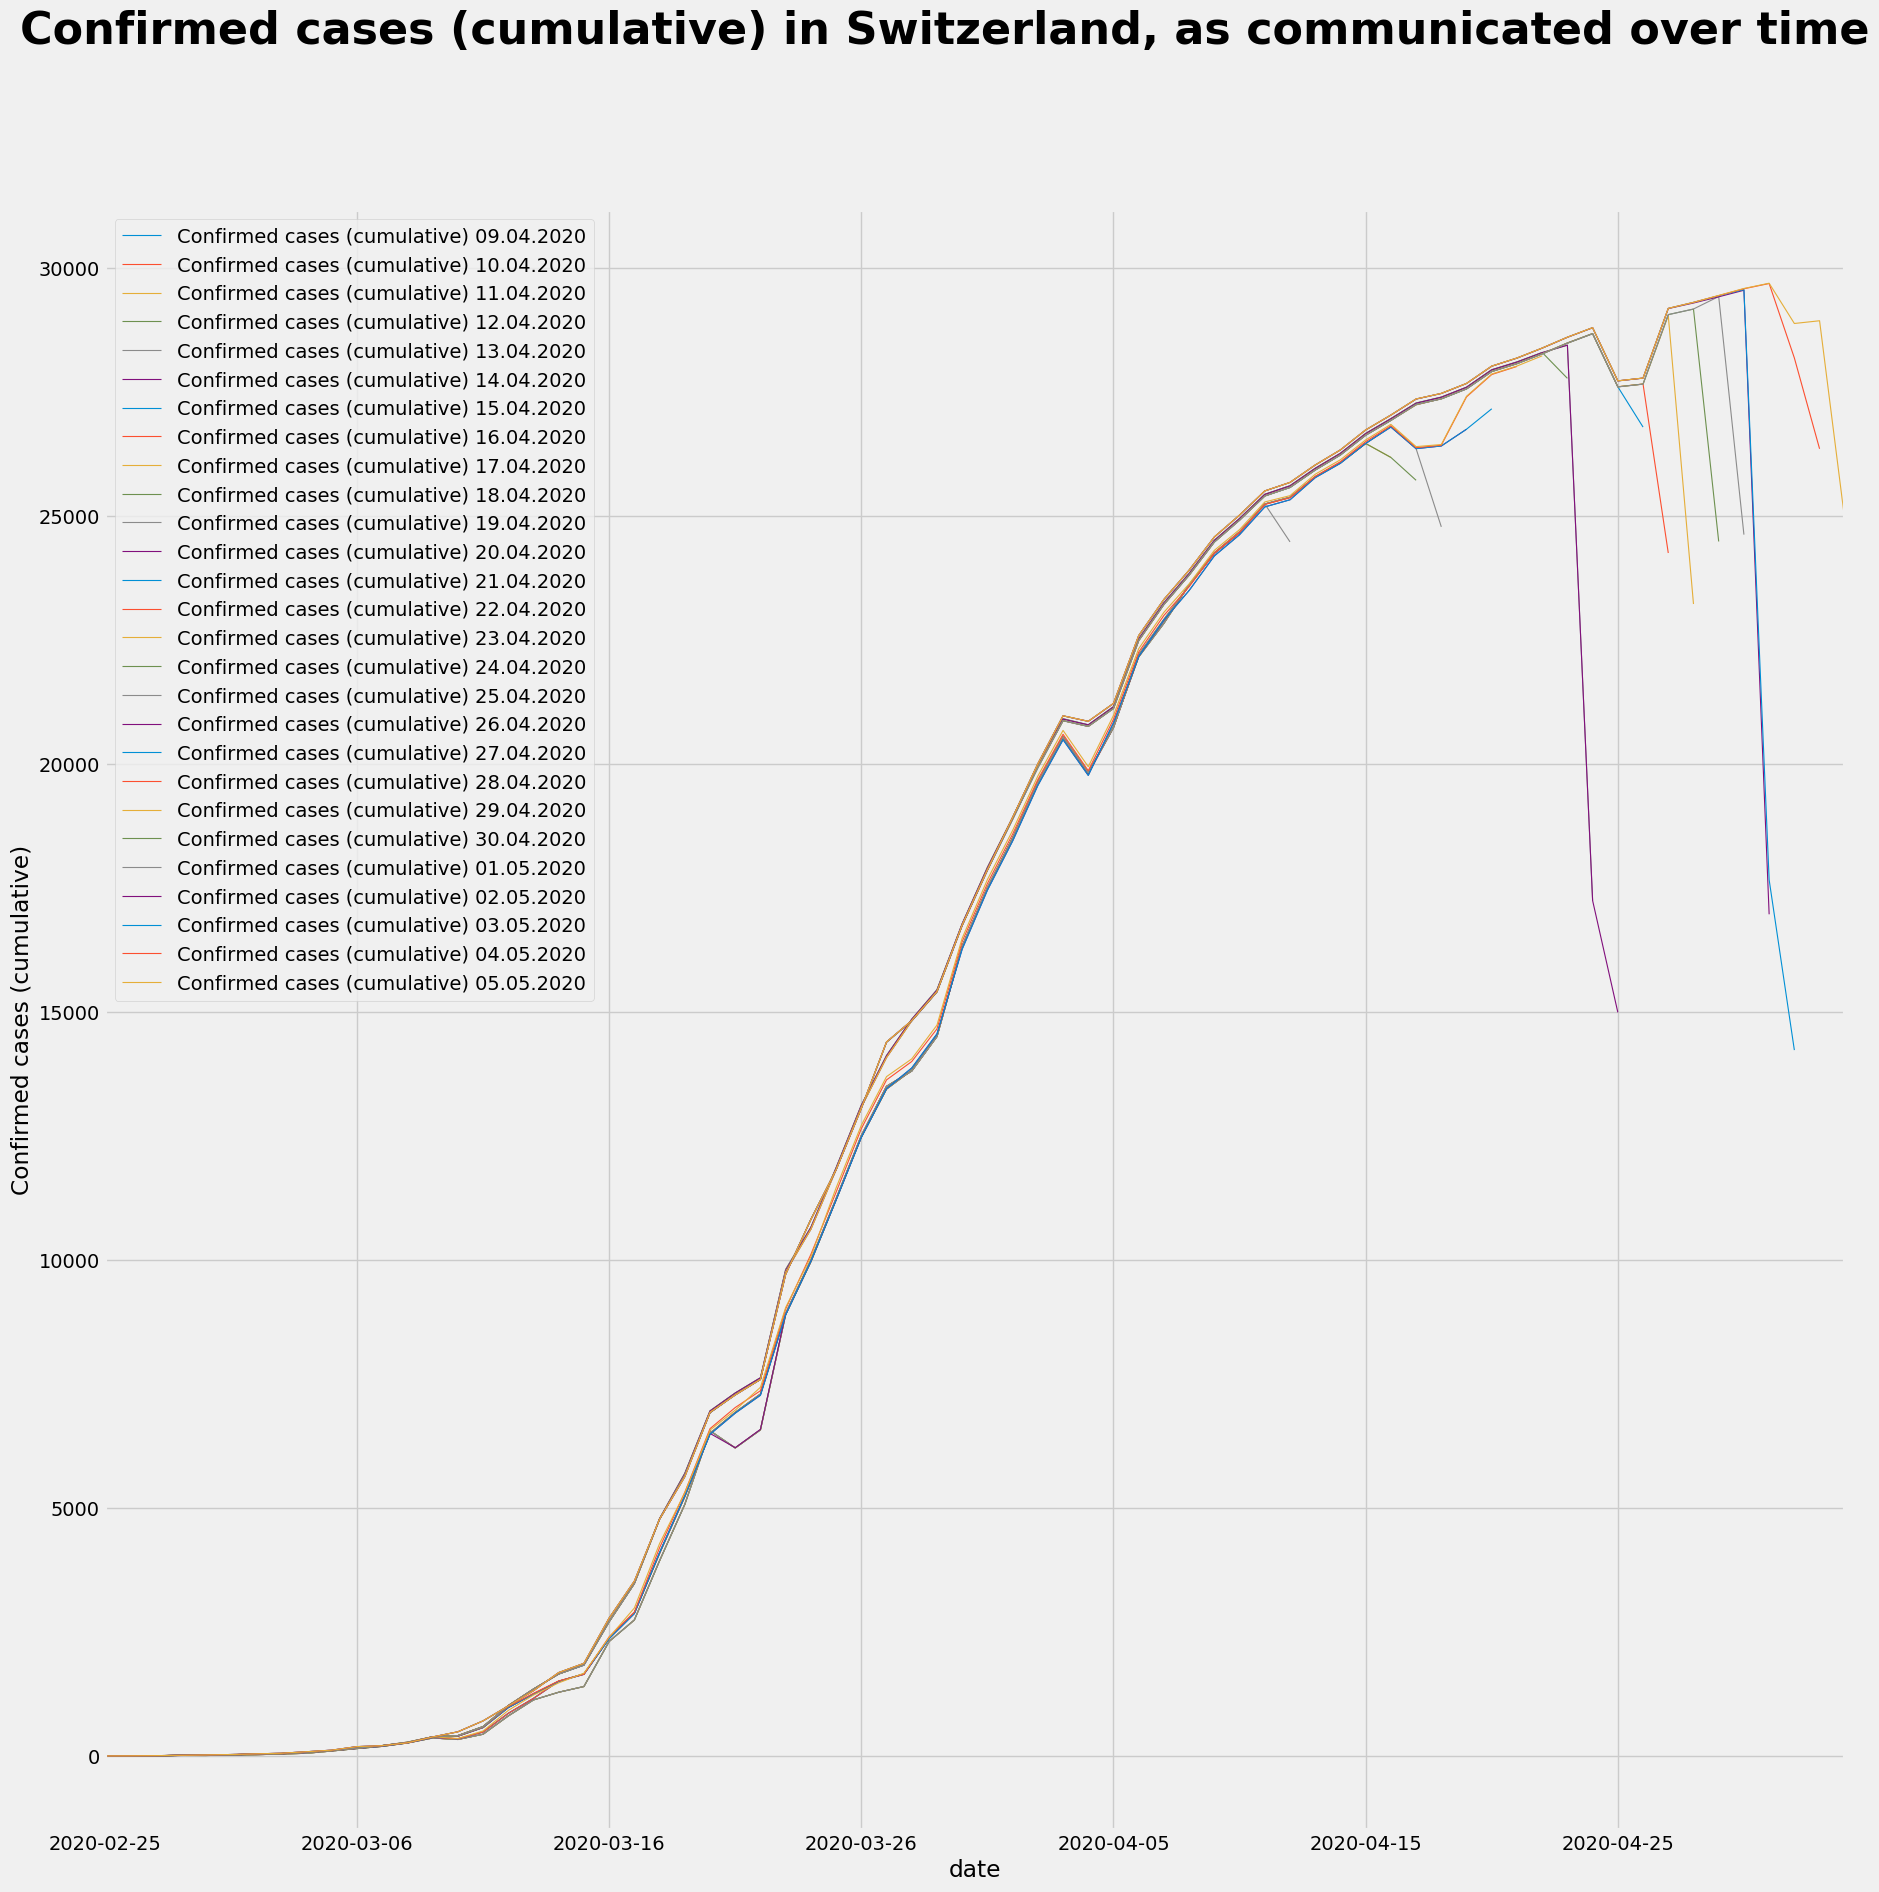

In [43]:
start_date = datetime.datetime(year=2020, month=4, day=9)
end_date = datetime.datetime(year=2020, month=5, day=5)
#end_date = datetime.datetime.now()

use_style('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20,20))
fig.suptitle('Confirmed cases (cumulative) in Switzerland, as communicated over time', fontsize=32, fontweight='bold');
ax.set_ylabel('Confirmed cases (cumulative)')
ax.set_xlabel('Publication date')

for current_date in pd.date_range(start_date, end_date):
    print(current_date)
    df_day = get_file_from_date(repo, current_date.strftime("%Y-%m-%d"), 'COVID19_Fallzahlen_CH_total_v2.csv')
    sum_df = df_day.groupby(['date']).sum().reset_index()
    sum_df.drop(sum_df.tail(1).index,inplace=True) # drop the last row
    sum_df.plot(kind='line', y='ncumul_conf', x="date", label=f"Confirmed cases (cumulative) {current_date.strftime('%d.%m.%Y')}", ax=ax, linewidth=0.8)
plt.show()

2020-04-09 00:00:00
2020-04-10 00:00:00
2020-04-11 00:00:00
2020-04-12 00:00:00
2020-04-13 00:00:00
2020-04-14 00:00:00
2020-04-15 00:00:00
2020-04-16 00:00:00
2020-04-17 00:00:00
2020-04-18 00:00:00
2020-04-19 00:00:00
2020-04-20 00:00:00
2020-04-21 00:00:00
2020-04-22 00:00:00
2020-04-23 00:00:00
2020-04-24 00:00:00
2020-04-25 00:00:00
2020-04-26 00:00:00
2020-04-27 00:00:00
2020-04-28 00:00:00
2020-04-29 00:00:00
2020-04-30 00:00:00
2020-05-01 00:00:00
2020-05-02 00:00:00
2020-05-03 00:00:00
2020-05-04 00:00:00
2020-05-05 00:00:00


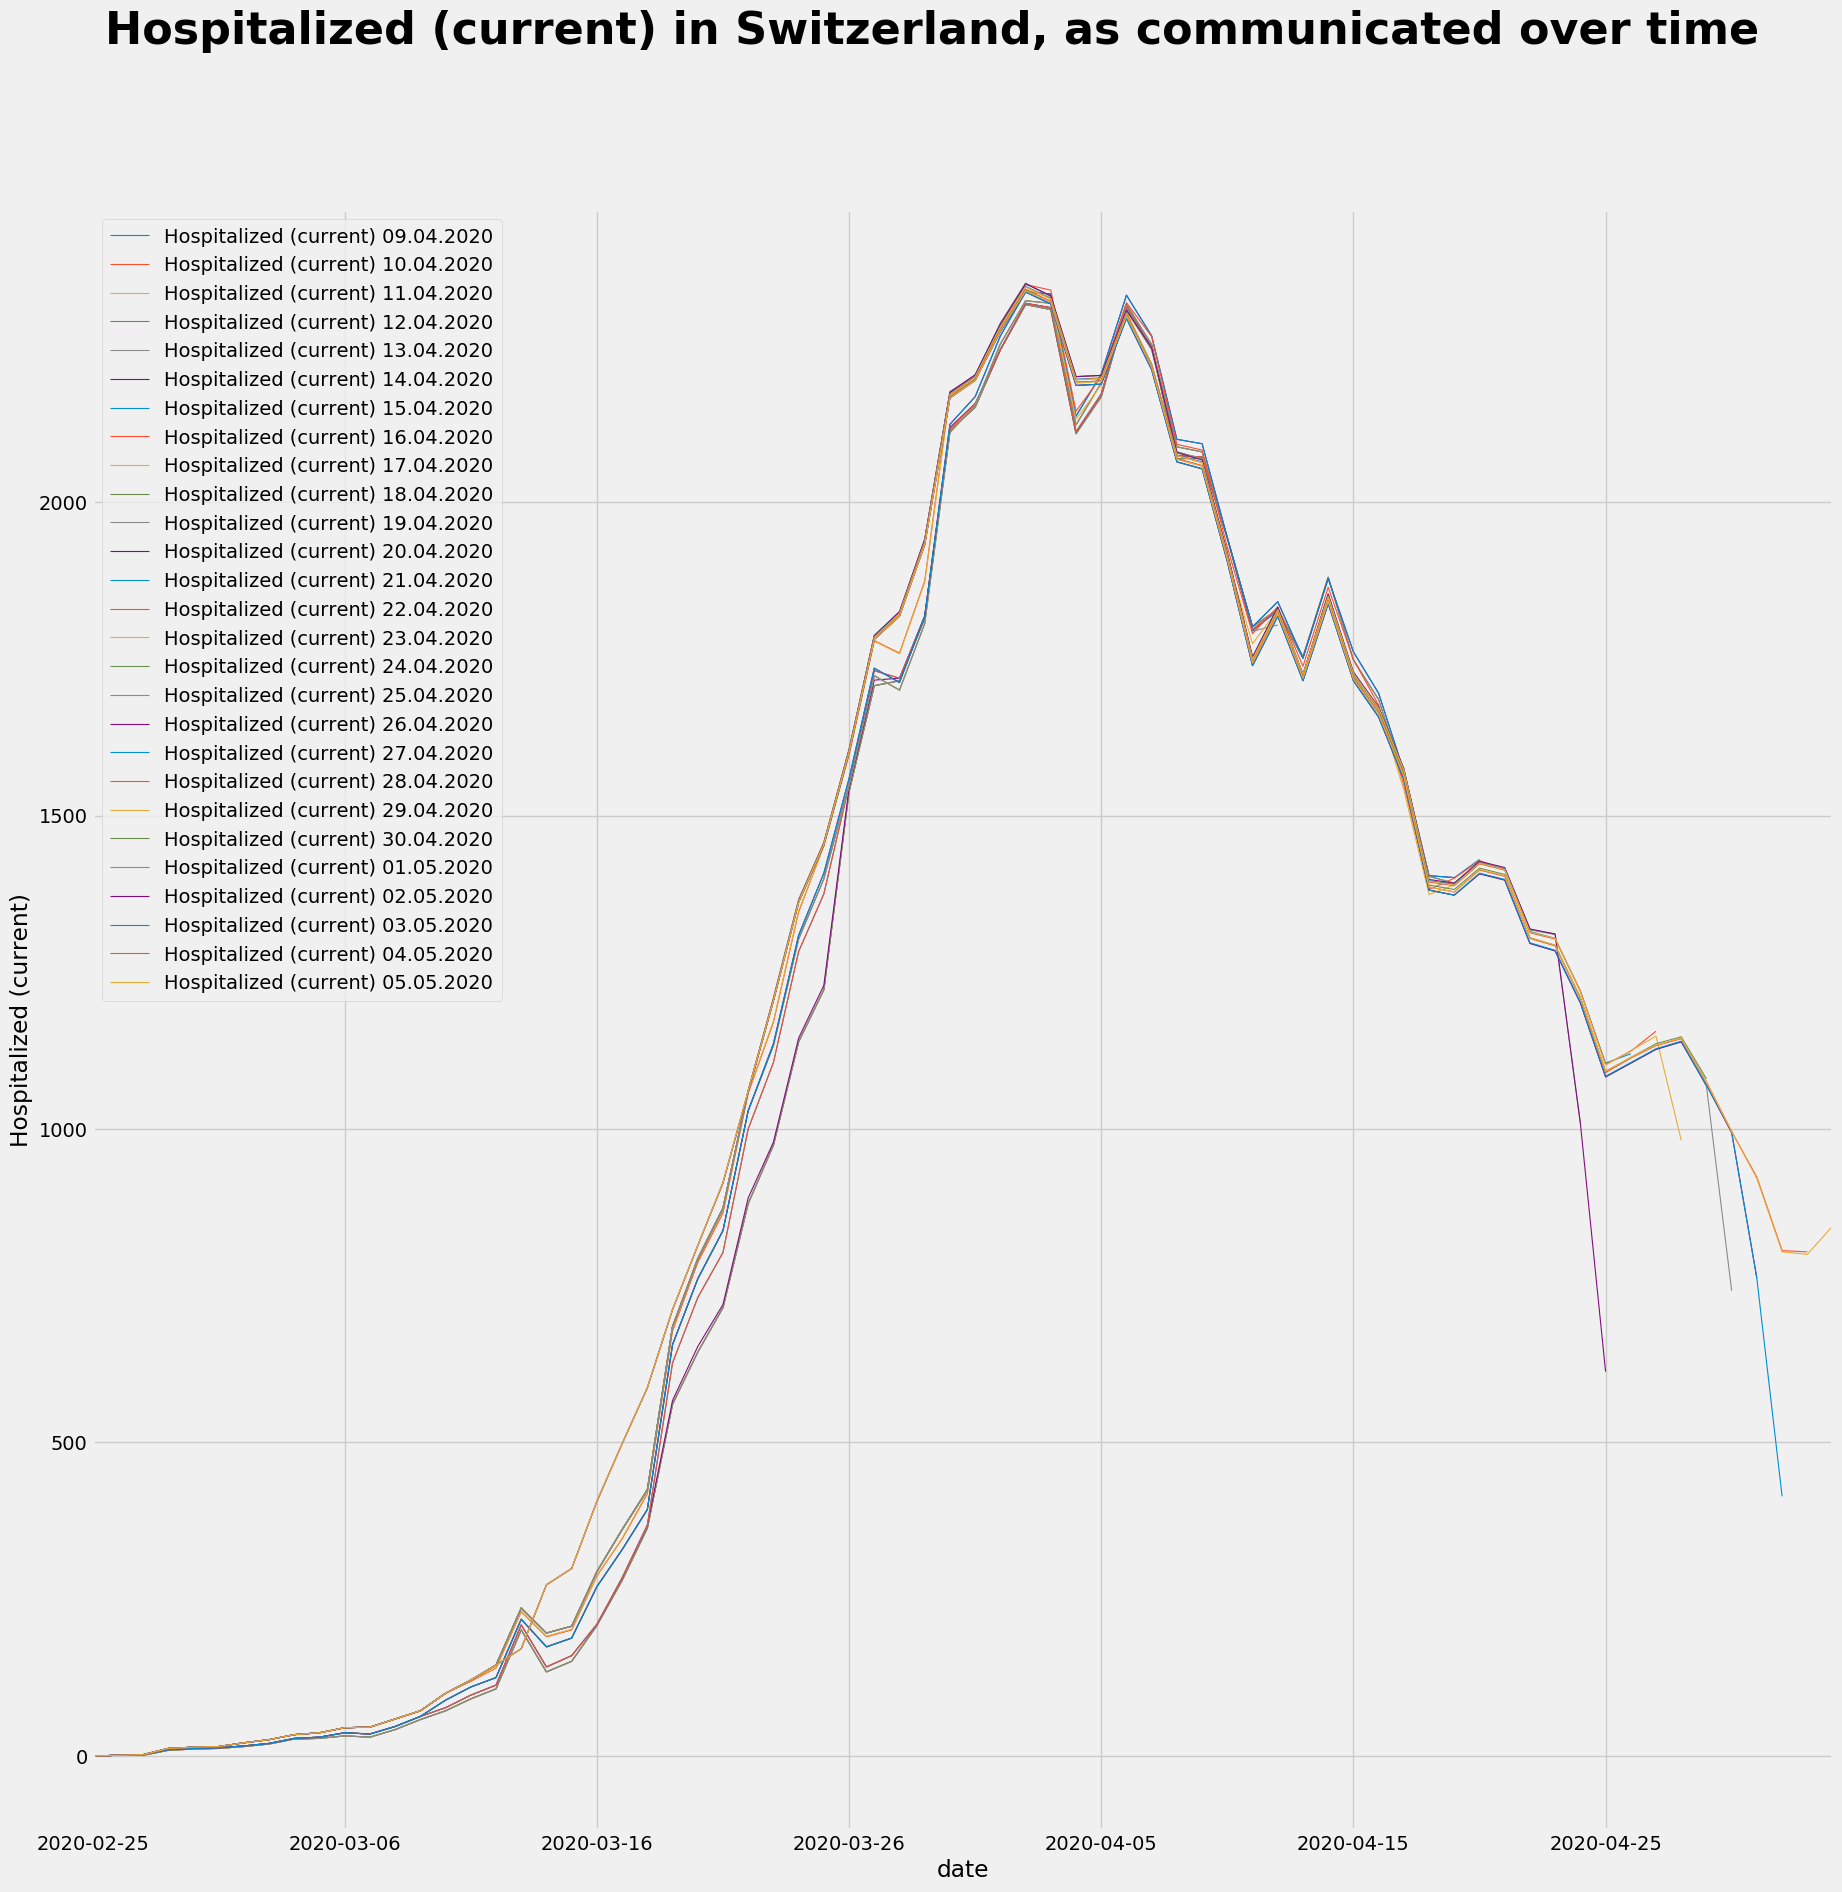

In [40]:
start_date = datetime.datetime(year=2020, month=4, day=9)
end_date = datetime.datetime(year=2020, month=5, day=5)
#end_date = datetime.datetime.now()

use_style('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20,20))
fig.suptitle('Hospitalized (current) in Switzerland, as communicated over time', fontsize=32, fontweight='bold');
ax.set_ylabel('Hospitalized (current)')
ax.set_xlabel('Publication date')

for current_date in pd.date_range(start_date, end_date):
    print(current_date)
    df_day = get_file_from_date(repo, current_date.strftime("%Y-%m-%d"), 'COVID19_Fallzahlen_CH_total_v2.csv')
    sum_df = df_day.groupby(['date']).sum().reset_index()
    sum_df.drop(sum_df.tail(1).index,inplace=True) # drop the last row
    sum_df.plot(kind='line', y='current_hosp', x="date", label=f"Hospitalized (current) {current_date.strftime('%d.%m.%Y')}", ax=ax, linewidth=0.8)
plt.show()

2020-04-09 00:00:00
2020-04-10 00:00:00
2020-04-11 00:00:00
2020-04-12 00:00:00
2020-04-13 00:00:00
2020-04-14 00:00:00
2020-04-15 00:00:00
2020-04-16 00:00:00
2020-04-17 00:00:00
2020-04-18 00:00:00
2020-04-19 00:00:00
2020-04-20 00:00:00
2020-04-21 00:00:00
2020-04-22 00:00:00
2020-04-23 00:00:00
2020-04-24 00:00:00
2020-04-25 00:00:00
2020-04-26 00:00:00
2020-04-27 00:00:00
2020-04-28 00:00:00
2020-04-29 00:00:00
2020-04-30 00:00:00
2020-05-01 00:00:00
2020-05-02 00:00:00
2020-05-03 00:00:00
2020-05-04 00:00:00
2020-05-05 00:00:00


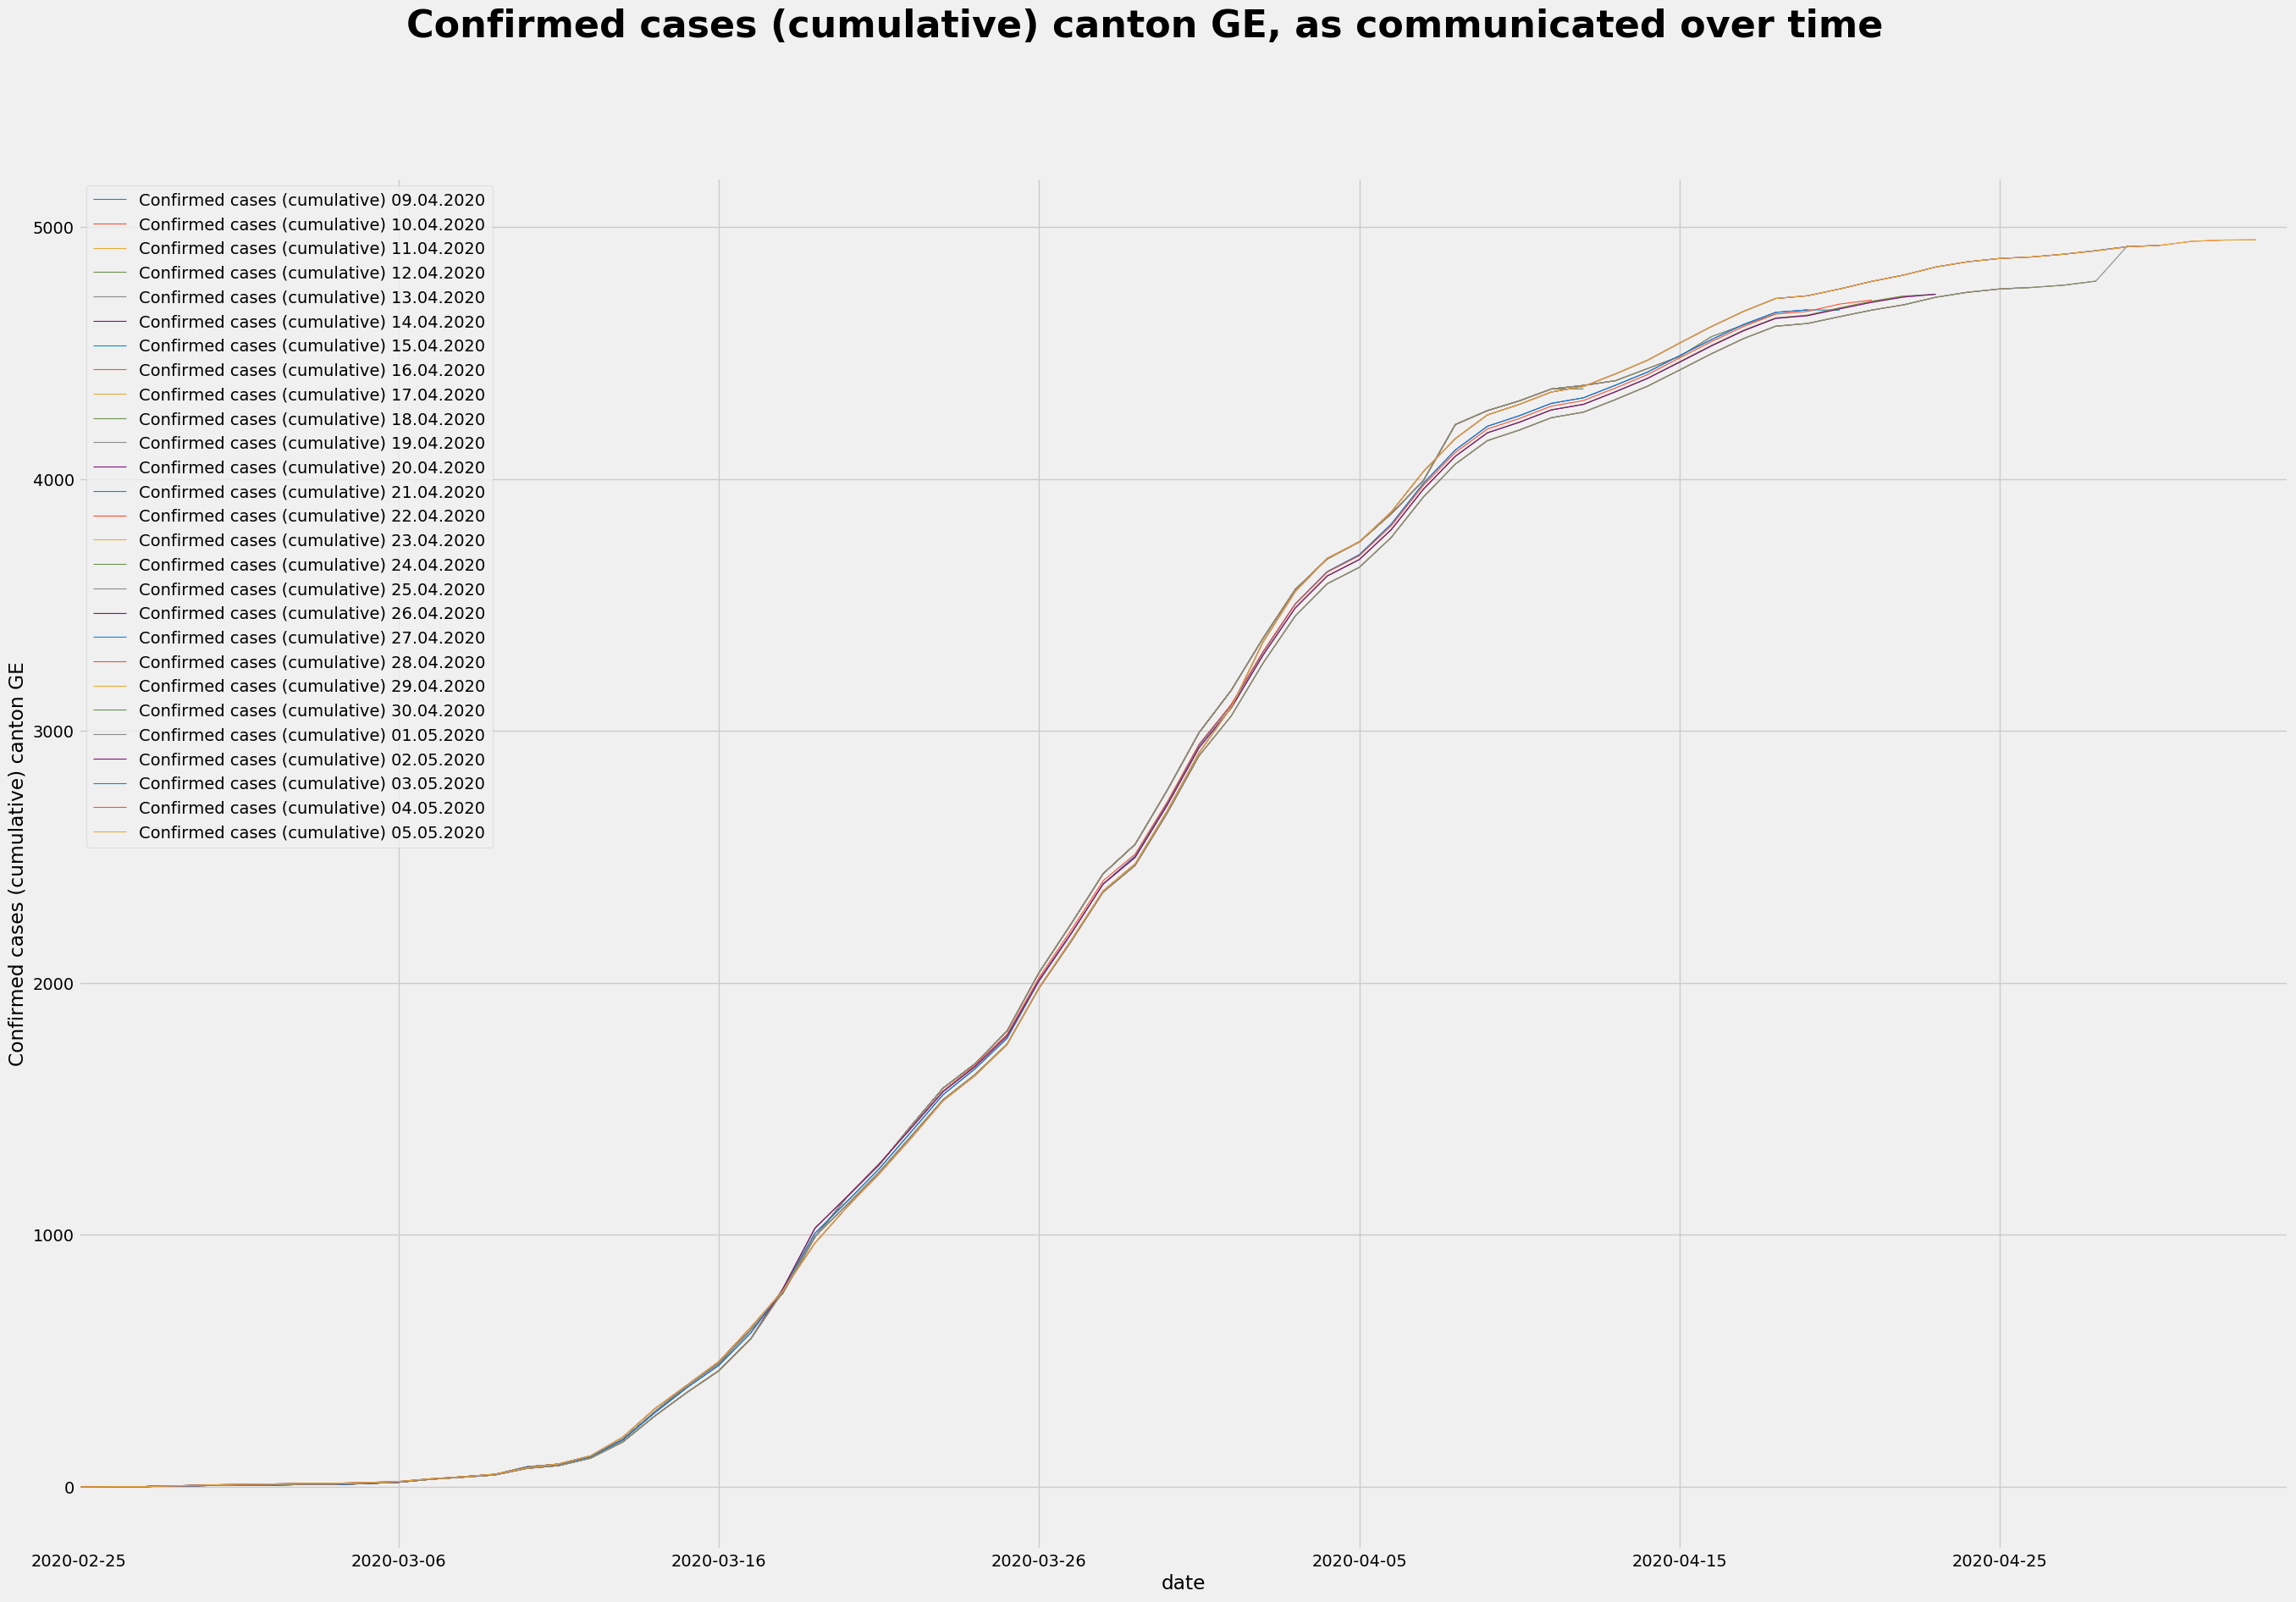

In [27]:
start_date = datetime.datetime(year=2020, month=4, day=9)
end_date = datetime.datetime(year=2020, month=5, day=5)
#end_date = datetime.datetime.now()

use_style('fivethirtyeight')
fig, ax = plt.subplots(figsize=(30,20))
fig.suptitle('Confirmed cases (cumulative) canton GE, as communicated over time', fontsize=32, fontweight='bold');
ax.set_ylabel('Confirmed cases (cumulative) canton GE')
ax.set_xlabel('Date of publication')

for current_date in pd.date_range(start_date, end_date):
    print(current_date)
    df_day = get_file_from_date(repo, current_date.strftime("%Y-%m-%d"), 'fallzahlen_kanton_total_csv_v2/COVID19_Fallzahlen_Kanton_GE_total.csv')
    df_day.plot(kind='line', y='ncumul_conf', x="date", label=f"Confirmed cases (cumulative) {current_date.strftime('%d.%m.%Y')}", ax=ax, linewidth=0.8)
plt.show()

In [29]:
df_day.columns

Index(['date', 'time', 'abbreviation_canton_and_fl', 'ncumul_tested',
       'ncumul_conf', 'new_hosp', 'current_hosp', 'current_icu',
       'current_vent', 'ncumul_released', 'ncumul_deceased', 'source',
       'ncumul_ICF'],
      dtype='object')

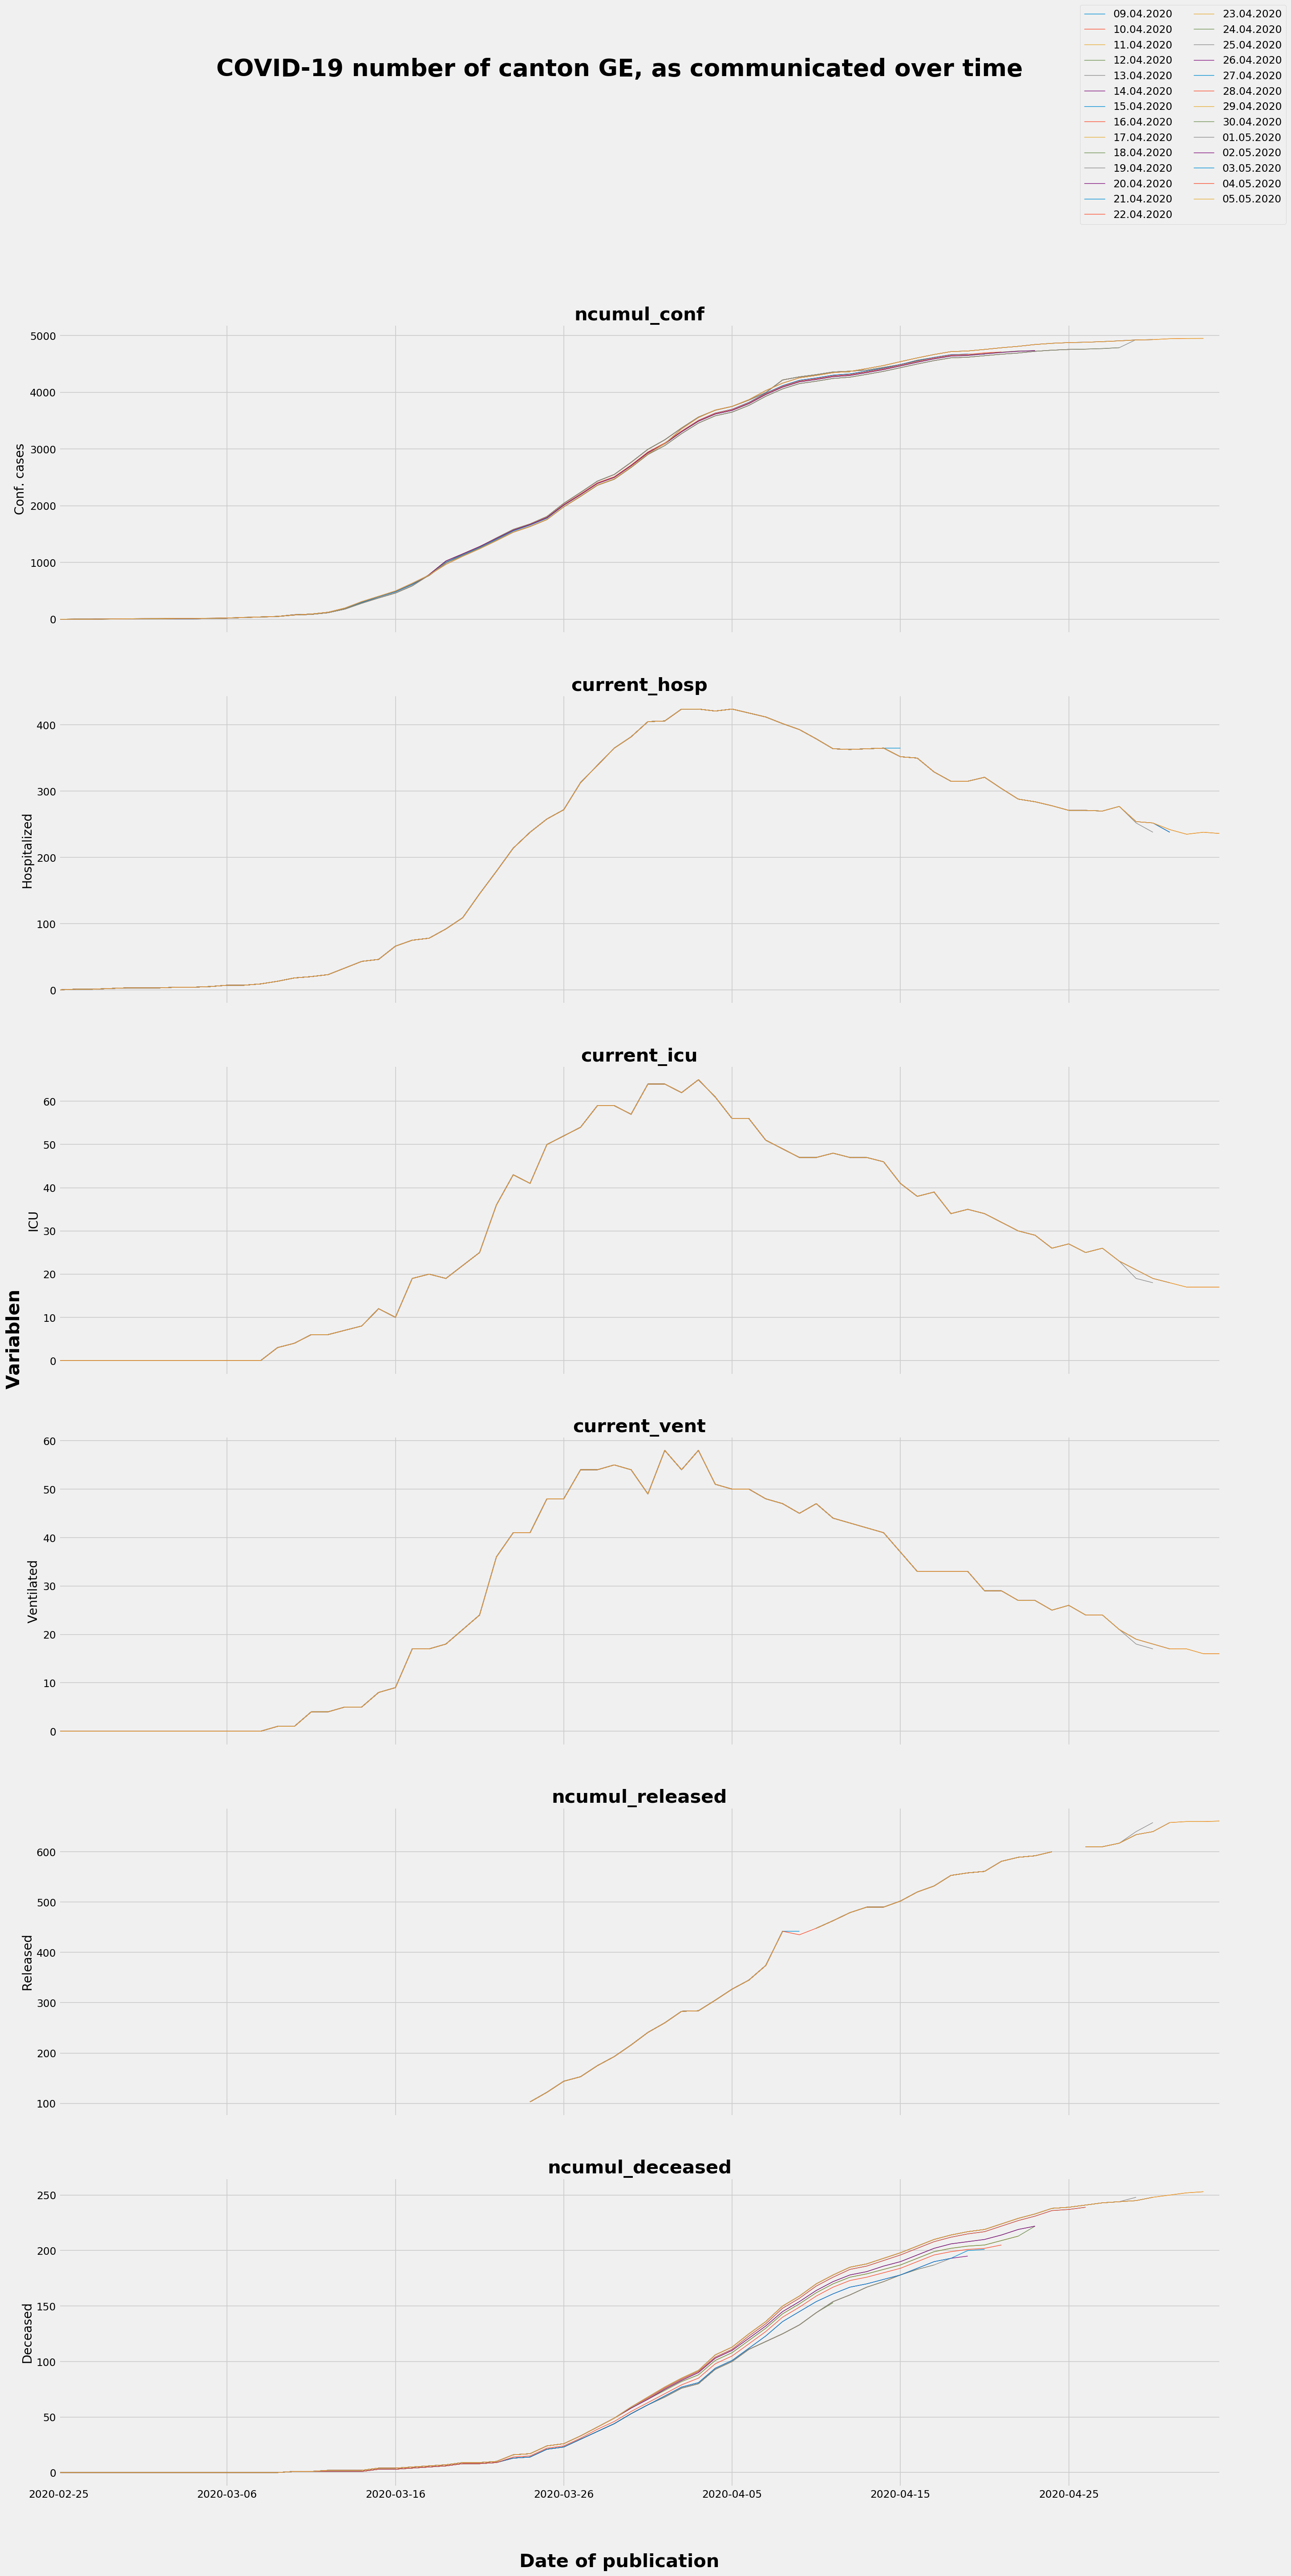

In [61]:
variables = {
    'ncumul_conf': 'Conf. cases',
    'current_hosp': 'Hospitalized',
    'current_icu': 'ICU',
    'current_vent': 'Ventilated', 
    'ncumul_released': 'Released', 
    'ncumul_deceased': 'Deceased',
}
start_date = datetime.datetime(year=2020, month=4, day=9)
end_date = datetime.datetime(year=2020, month=5, day=5)
#end_date = datetime.datetime.now()

use_style('fivethirtyeight')
fig, ax = plt.subplots(nrows=len(variables), sharex=True, figsize=(25,50), dpi=120)
fig.suptitle('COVID-19 number of canton GE, as communicated over time', fontsize=32, fontweight='bold');

labels = []
for current_date in pd.date_range(start_date, end_date):
    labels.append(current_date.strftime('%d.%m.%Y'))
    df_day = get_file_from_date(repo, current_date.strftime("%Y-%m-%d"), 'fallzahlen_kanton_total_csv_v2/COVID19_Fallzahlen_Kanton_GE_total.csv')
    for i, (var, label) in enumerate(variables.items()):
        ax[i].set_title(label=var, fontdict={"fontsize": 25, "fontweight": 'bold'})
        ax[i].set_ylabel(label)
        ax[i].set_xlabel('Date of publication')

        df_day.plot(kind='line', y=var, x="date", label=f"{label} - {current_date.strftime('%d.%m.%Y')}", ax=ax[i], linewidth=0.8)
        ax[i].legend().set_visible(False)
        ax[i].xaxis.label.set_visible(False)

fig.legend(handles=ax[len(variables)-1].lines,     # The line objects
           labels=labels,   # The labels for each line
           ncol=2,            # number of columns for legend
           borderaxespad=0.1,    # Small spacing around legend box
           bbox_to_anchor=(0, 0, 1, 1),
           bbox_transform=plt.gcf().transFigure
           )
                    
fig.text(0.5, 0.04, 'Date of publication', ha='center', fontdict={"fontsize": 25, "fontweight": 'bold'})
fig.text(0.04, 0.5, 'Variablen', va='center', rotation='vertical', fontdict={"fontsize": 25, "fontweight": 'bold'})
plt.show()